In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

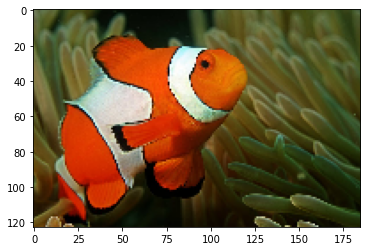

In [6]:
nemo = cv2.imread("src/img/nemo.jpg")
nemo = cv2.resize(nemo, (0, 0), fx=0.2, fy=0.2)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)

In [7]:
nemo.shape

(123, 185, 3)

In [8]:
test = np.array([[1, 2],
[3, 4],
[5, 6],
[7, 8],
[9, 10],
[11, 12]])
test = test.reshape((4, 3))
test

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [9]:
pixel_colors = nemo.reshape((nemo.shape[0] * nemo.shape[1], 3)) / 255.0

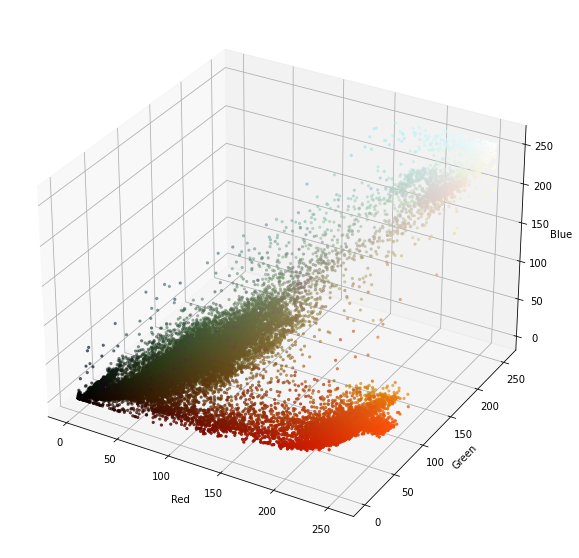

In [10]:
R, G, B = cv2.split(nemo)

fig = plt.figure(figsize=[10, 10])
axis = fig.add_subplot(1, 1, 1, projection= "3d")
axis.scatter(R.flatten(), G.flatten(), B.flatten(), facecolors = pixel_colors, marker = '.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [11]:
R.shape

(123, 185)

In [12]:
# numpy Flatten
# A 1-D flat iterator over the array
r = R.flatten()
# r.shape()

In [13]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

H, S, V =cv2.split(nemo_hsv)

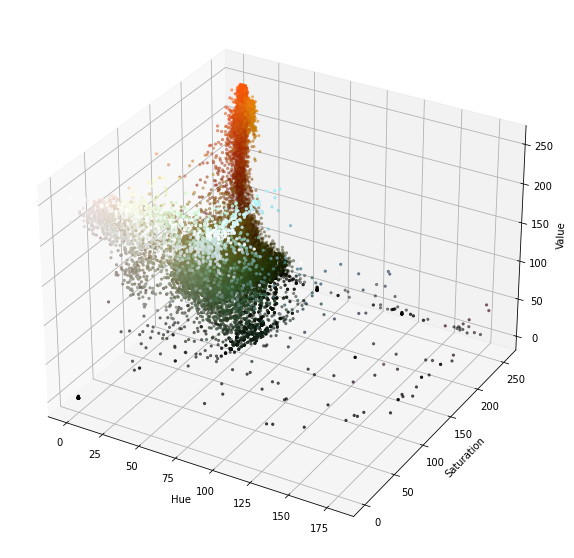

In [14]:
fig = plt.figure(figsize=[10, 10])
axis = fig.add_subplot(1, 1, 1, projection= "3d")
axis.scatter(H.flatten(), S.flatten(), V.flatten(), facecolors = pixel_colors, marker = '.')
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

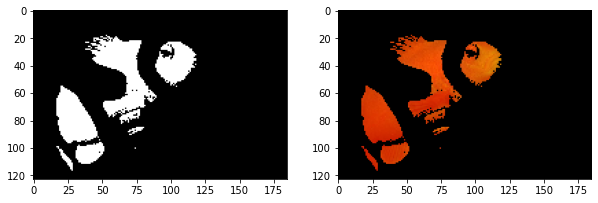

In [15]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
result = cv2.bitwise_and(nemo, nemo, mask = mask_orange)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(mask_orange, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

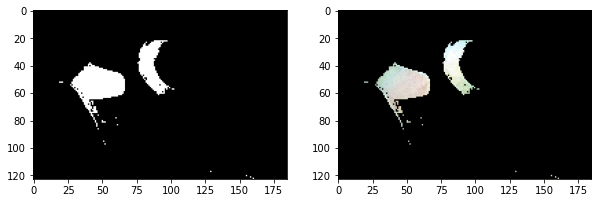

In [16]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
result = cv2.bitwise_and(nemo, nemo, mask = mask_white)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()



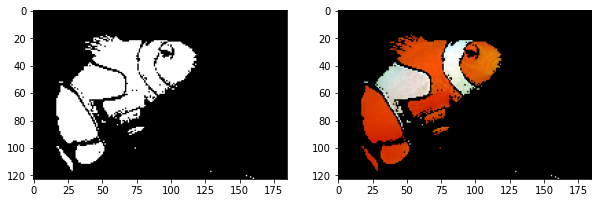

In [17]:
final_mask = mask_orange + mask_white
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()


In [18]:
# x1 = H , x2 = S, x3 = V
X_train = np.array([H.flatten(), S.flatten(), V.flatten()]).T
X_train.shape

(22755, 3)

In [19]:
# Y_train = np.zeros((nemo.shape[0]*nemo.shape[1], 1))
# Y_train.shape

In [20]:
Y_train = final_mask.flatten() // 255
Y_train.shape

(22755,)

In [21]:
# test = np.array([1, 2, 3, 4, 5])
# np.where(test > 2)
# # result show indexes
# np.where(test % 2 == 0)

In [22]:
from knn import KNearestNeighbors

In [23]:
my_knn = KNearestNeighbors(k = 7)
my_knn.fit(X_train, Y_train)


# my_knn.fit(X_train, Y_train)

# X_test = np.array([23/2, 95*2.55, 100*2.55])
# answer = my_knn.predict(X_test)

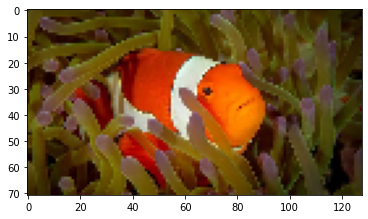

In [24]:
nemo_brother = cv2.imread("src/img/dadashe-nemo.jpg")
nemo_brother = cv2.resize(nemo_brother, (0, 0), fx=0.2, fy=0.2)
nemo_brother = cv2.cvtColor(nemo_brother, cv2.COLOR_BGR2RGB)
plt.imshow(nemo_brother)
plt.show()


In [25]:
nemo_brother_hsv = cv2.cvtColor(nemo_brother, cv2.COLOR_RGB2HSV)
X_test  = nemo_brother_hsv.reshape((nemo_brother_hsv.shape[0]*nemo_brother_hsv.shape[1], 3))


In [26]:
answer = my_knn.predict(X_test)

71
128
[0 0 0 ... 0 0 0]


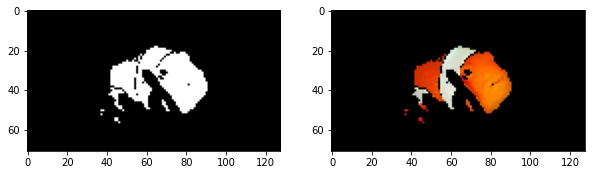

In [27]:
print(nemo_brother_hsv.shape[0])
print(nemo_brother_hsv.shape[1])
print(answer)
test_mask = answer.reshape((nemo_brother_hsv.shape[0], nemo_brother_hsv.shape[1])).astype("uint8")
test_result = cv2.bitwise_and(nemo_brother, nemo_brother, mask=test_mask)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(test_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(test_result)
plt.show()